## **TP1**

Deep Learning

Juan Pablo Nieto Uribe

Resolver el problema de la XOR con 3 neuronas.

a. Implementar SGD para resolver la XOR

In [ ]:
import random as rn
import matplotlib.pyplot as plt

In [ ]:
global w111
global w112
global w121
global w122
global b1
global b2
global w211
global w212
global b3
global learningRate

In [ ]:
#Inicializamos los distintos parámetros manualmente
#Layer 1
w111=rn.random()
w112=rn.random()
w121=rn.random()
w122=rn.random()
b1=rn.random()
b2=rn.random()
#Layer 2
w211=rn.random()
w212=rn.random()
b3=rn.random()

In [ ]:
#Inicializamos los hiperparámetros del modelo
learningRate=0.01

#Inicializamos los distintos parámetros manualmente
#Layer 1
w111=0.149
w112=0.341
w121=0.975
w122=0.524
b1=0.707
b2=0.529
#Layer 2
w211=0.163
w212=0.613
b3=0.943

In [ ]:
def repError(x1,x2):
    if x1!=x2:
        return 1
    else: 
        return 0 

In [ ]:
def funcionSigmoidea(x):
    ealax=2.718281828**(-x)
    arriba=1
    abajo=1+ealax
    return arriba/abajo

In [ ]:
def derivadaSigmoidea(x):
    sig=funcionSigmoidea(x)
    devolver=sig*(1-sig)
    return devolver

In [ ]:
def forward(x1,x2):
    #Corremos la parte lineal
    n1l1=(w111*x1)+(w112*x2)+b1
    n2l1=(w121*x1)+(w122*x2)+b2
    #Metemos esos valores en la sigmoidea
    sign1l1=funcionSigmoidea(n1l1)
    sign2l1=funcionSigmoidea(n2l1)
    n1l2=(sign1l1*w211)+(sign2l1*w212)+b3
    #BORRAR__________
    print('---FORWARD---')
    #print(n1l1,n2l1,sign1l1,sign2l1,n1l2)
    print('n1l1 es', n1l1)
    print('n2l1 es ', n2l1)
    print('sign1l1 es',sign1l1)
    print('sign2l1 es',sign2l1)
    print('n1l2 es', n1l2)
    print('___FORWARD___')
    #________________
    return n1l2

In [ ]:
def backwards(yi,yhati,x1,x2):
    #Sea K=yi-yhati

    d111=0
    d112=0
    d121=0
    d122=0
    d211=0
    d212=0
    db1=0
    db2=0
    db3=0
    
    k=yi-yhati
    n1l1=(w111*x1)+(w112*x2)+b1
    n2l1=(w121*x1)+(w122*x2)+b2
    derivadaSigmoidea1=derivadaSigmoidea(n1l1)
    derivadaSigmoidea2=derivadaSigmoidea(n2l1)

    d111=-2*k*w211*derivadaSigmoidea1*x1
    d112=-2*k*w212*derivadaSigmoidea2*x1
    d121=-2*k*w211*derivadaSigmoidea1*x2
    d122=-2*k*w212*derivadaSigmoidea2*x2
    d211=-2*k*funcionSigmoidea(n1l1)
    d212=-2*k*funcionSigmoidea(n2l1)
    db1=2*k*w211*derivadaSigmoidea1
    db2=2*k*w212*derivadaSigmoidea2
    db3=(-1)*k

    #BORRAR_____
    print('---BACKWARD---')
    print('K es',k)
    print('d111 es ',d111)
    print('d112 es', d122)
    print('d121 es', d121)
    print('d122 es', d122)
    print('d211 es', d211)
    print('d212 es', d212)
    print('db1 es', db1)
    print('db2 es', db2)
    print('db3 es', db3)


    print('para el calculo de d112')
    print('k es',k)
    print('w212 es',w121)
    print('derivadaSigmoidea2 es',derivadaSigmoidea2)
    print('x1 es',x1)
    print('___BACKWARD___')

    return d111,d112,d121,d122,d211,d212,db1,db2,db3

In [ ]:
def actualizarPesos(learningRate=0.01):
    #Comienzo haciendo backpropagation
    d111,d112,d121,d122,d211,d212,db1,db2,db3=backwards(errorReportado,valForward,xa,xb)
    global w111
    global w111
    global w112
    global w121
    global w122
    global b1
    global b2
    global w211
    global w212
    global b3
    w111=w111-learningRate*d111
    w112=w112-learningRate*d112
    w121=w121-learningRate*d121
    w122=w122-learningRate*d122
    w211=w211-learningRate*d211
    w212=w212-learningRate*d212
    b1=b1-learningRate*db1
    b2=b2-learningRate*db2
    b3=b3-learningRate*db3

In [ ]:
def mse(arrayForward,arrayRep):
  valMse=0
  for i in range (0,3):
    yi=arrayForward[i]
    yhati=arrayRep[i]
    restaCuad=(yi-yhati)**2
    valMse=valMse+restaCuad
  valMse=valMse/4
  return valMse

In [ ]:
X=[[0,0,1,1],[0,1,0,1]]
X1,X2=X[0],X[1]

#Inicializo un array para guardar lo que me arroja el MSE
#arrayMSE=[]
#Defino los valores de la cantidad de Epochs y el Learning Rate
arrEpochs=[]
arrMSE=[]
cantidadEpochs=100
#MSE
for epochs in range(cantidadEpochs):
    #Creo arrays para evaluar el MSE
    arrayForward=[]
    arrayRep=[]
    for i in range (4):

        print('LA EPOCH ES',epochs+1,'EL INPUT ES',i+1)
        #Hago la ejecución normal
        xa,xb=X1[i],X2[i]
        valForward=forward(xa,xb)
        arrayForward.append(valForward)
        #El valor de errorReportado representa a yi
        errorReportado=repError(xa,xb)
        arrayRep.append(errorReportado)
        errorCalculado=errorReportado-valForward
        #Estoy llamando al método que me hace Backpropagation dentro del método actualizarPesos
        actualizarPesos(learningRate)
        #print('Epoch',epochs, 'Error', errorCalculado)
    print(arrayForward)
    arrEpochs.append(epochs+1)
    valMse=mse(arrayForward,arrayRep)
    arrMSE.append(valMse)
    #arrayMSE.append(valMse)
    print('Epoch ',epochs,' MSE ',valMse)

Streaming output truncated to the last 5000 lines.
[0.4994874414493462, 0.4782285064308594, 0.5158880961071439, 0.5218621573885847]
Epoch  50  MSE  0.18902438278943795
LA EPOCH ES 52 EL INPUT ES 1
---FORWARD---
n1l1 es 0.700114555814094
n2l1 es  0.569738702135667
sign1l1 es 0.6682131701512807
sign2l1 es 0.6387028798222245
n1l2 es 0.4992977564494245
___FORWARD___
---BACKWARD---
K es -0.4992977564494245
d111 es  -0.0
d112 es 0.0
d121 es -0.0
d122 es 0.0
d211 es 0.667274673372984
d212 es 0.6378058298660462
db1 es 0.06703791901222758
db2 es -0.03002234185589264
db3 es 0.4992977564494245
para el calculo de d112
k es -0.4992977564494245
w212 es 0.9761865074189163
derivadaSigmoidea2 es 0.23076151112902155
x1 es 0
___BACKWARD___
LA EPOCH ES 52 EL INPUT ES 2
---FORWARD---
n1l1 es 1.0289733908759198
n2l1 es  1.0850698395634928
sign1l1 es 0.7367168178054208
sign2l1 es 0.7474522038467365
n1l2 es 0.47804692753919514
___FORWARD___
---BACKWARD---
K es 0.5219530724608048
d111 es  0.0
d112 es -0.024416

In [ ]:
arrEpochs

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

In [ ]:
arrMSE

[0.6364670363959642,
 0.505255184006932,
 0.4075114268524793,
 0.3352506385968874,
 0.2823033964603533,
 0.2439261680383222,
 0.21648680915890428,
 0.19721444417238948,
 0.18400259792248477,
 0.17525542052859538,
 0.1697682613287669,
 0.16663532954226304,
 0.1651785480085604,
 0.16489289252298112,
 0.16540449861206297,
 0.16643862264901785,
 0.167795188475722,
 0.16933016029607312,
 0.170941382323806,
 0.17255783729038143,
 0.17413151776746885,
 0.17563129132352642,
 0.17703828485440296,
 0.17834242455105986,
 0.1795398533964378,
 0.1806310136763881,
 0.18161923229872712,
 0.18250968526502004,
 0.18330864715433648,
 0.18402295405577732,
 0.1846596256425973,
 0.18522560525739468,
 0.18572758692933436,
 0.1861719059032563,
 0.18656447508879462,
 0.18691075426627332,
 0.18721574224546403,
 0.18748398471635114,
 0.18771959245162761,
 0.18792626596705025,
 0.18810732383145098,
 0.18826573262985422,
 0.1884041371870239,
 0.18852489010541162,
 0.18863007999944498,
 0.1887215580467419,
 0.1888

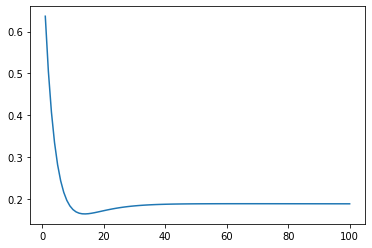

In [ ]:
plt.plot(arrEpochs,arrMSE)
plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


b. ¿Cuántos parámetros desconocidos tiene el modelo?

Este modelo tiene 9 parámetros desconocidos: 

*   6 Correspondientes a pesos
*   3 Correspondientes a biases



c. ¿Cuáles son los hiper-parámetros del modelo? Explicar qué pasa cuando se varía el learning rate.

Los hiperparámetros del modelo son:


*   Learning rate
*   Número de epochs



d. Una vez entrenado el modelo, realizar predicciones para verificar el funcionamiento.